In [21]:
import pandas
from lxml import etree
import re
import networkx as nx
import itertools

In [3]:
name = 'goethe-goetz-von-berlichingen-mit-der-eisernen-hand'
tree = etree.parse(f'gerdracor/tei/{name}.xml')

# Remove namespace
for elem in tree.getiterator():
    # Skip comments and processing instructions,
    # because they do not have names
    if not (
        isinstance(elem, etree._Comment)
        or isinstance(elem, etree._ProcessingInstruction)
    ):
        # Remove a namespace URI in the element's name
        elem.tag = etree.QName(elem).localname

# Remove unused namespace declarations
etree.cleanup_namespaces(tree)


In [19]:
scenes = {}

for i, scene in enumerate(tree.xpath('//body//div[@type="scene"]')):
    print(f'# Szene Nr. {i}')
    speakers = set()
    for sp in scene.xpath('.//speaker/text()'):
        speakers.add(re.sub(r'\.$', '', sp.lower()).strip())
    for sp in speakers:
        print(sp)
        
    scenes[f'Szene Nr. {i}'] = speakers

# Szene Nr. 0
metzler
wirt
erster reiter
sievers
zweiter reiter
# Szene Nr. 1
martin
der bube
götz
georg
# Szene Nr. 2
elisabeth
reiter
götz
maria
karl
weisslingen
weislingen
# Szene Nr. 3
abt
liebetraut
bischof
olearius
ein bedienter
# Szene Nr. 4
elisabeth
götz
maria
franz
weislingen
# Szene Nr. 5
adelheid
bischof
liebetraut
# Szene Nr. 6
götz
selbitz
# Szene Nr. 7
adelheid
liebetraut
fräulein
# Szene Nr. 8
götz
selbitz
georg
# Szene Nr. 9
bischof
franz
weislingen
# Szene Nr. 10
adelheid
franz
fräulein
weislingen
# Szene Nr. 11
franz
weislingen
# Szene Nr. 12
götz
selbitz
georg
# Szene Nr. 13
adelheid
weislingen
# Szene Nr. 14
götz
brautvater
bauer
bräutigam
selbitz
georg
# Szene Nr. 15
zweiter kaufmann
kaufleute
kaufmann
kaiser
erster kaufmann
weislingen
# Szene Nr. 16
sickingen
götz
# Szene Nr. 17
hauptmann
zweiter offizier
erster offizier
# Szene Nr. 18
sickingen
götz
# Szene Nr. 19
adelheid
franz
# Szene Nr. 20
lerse
götz
georg
# Szene Nr. 21
zweiter knecht
götz
knecht
erster kne

In [23]:
G = nx.Graph()

for speakers in scenes.values():
    for sp_a, sp_b in itertools.combinations(speakers, 2):
        G.add_edge(sp_a, sp_b)

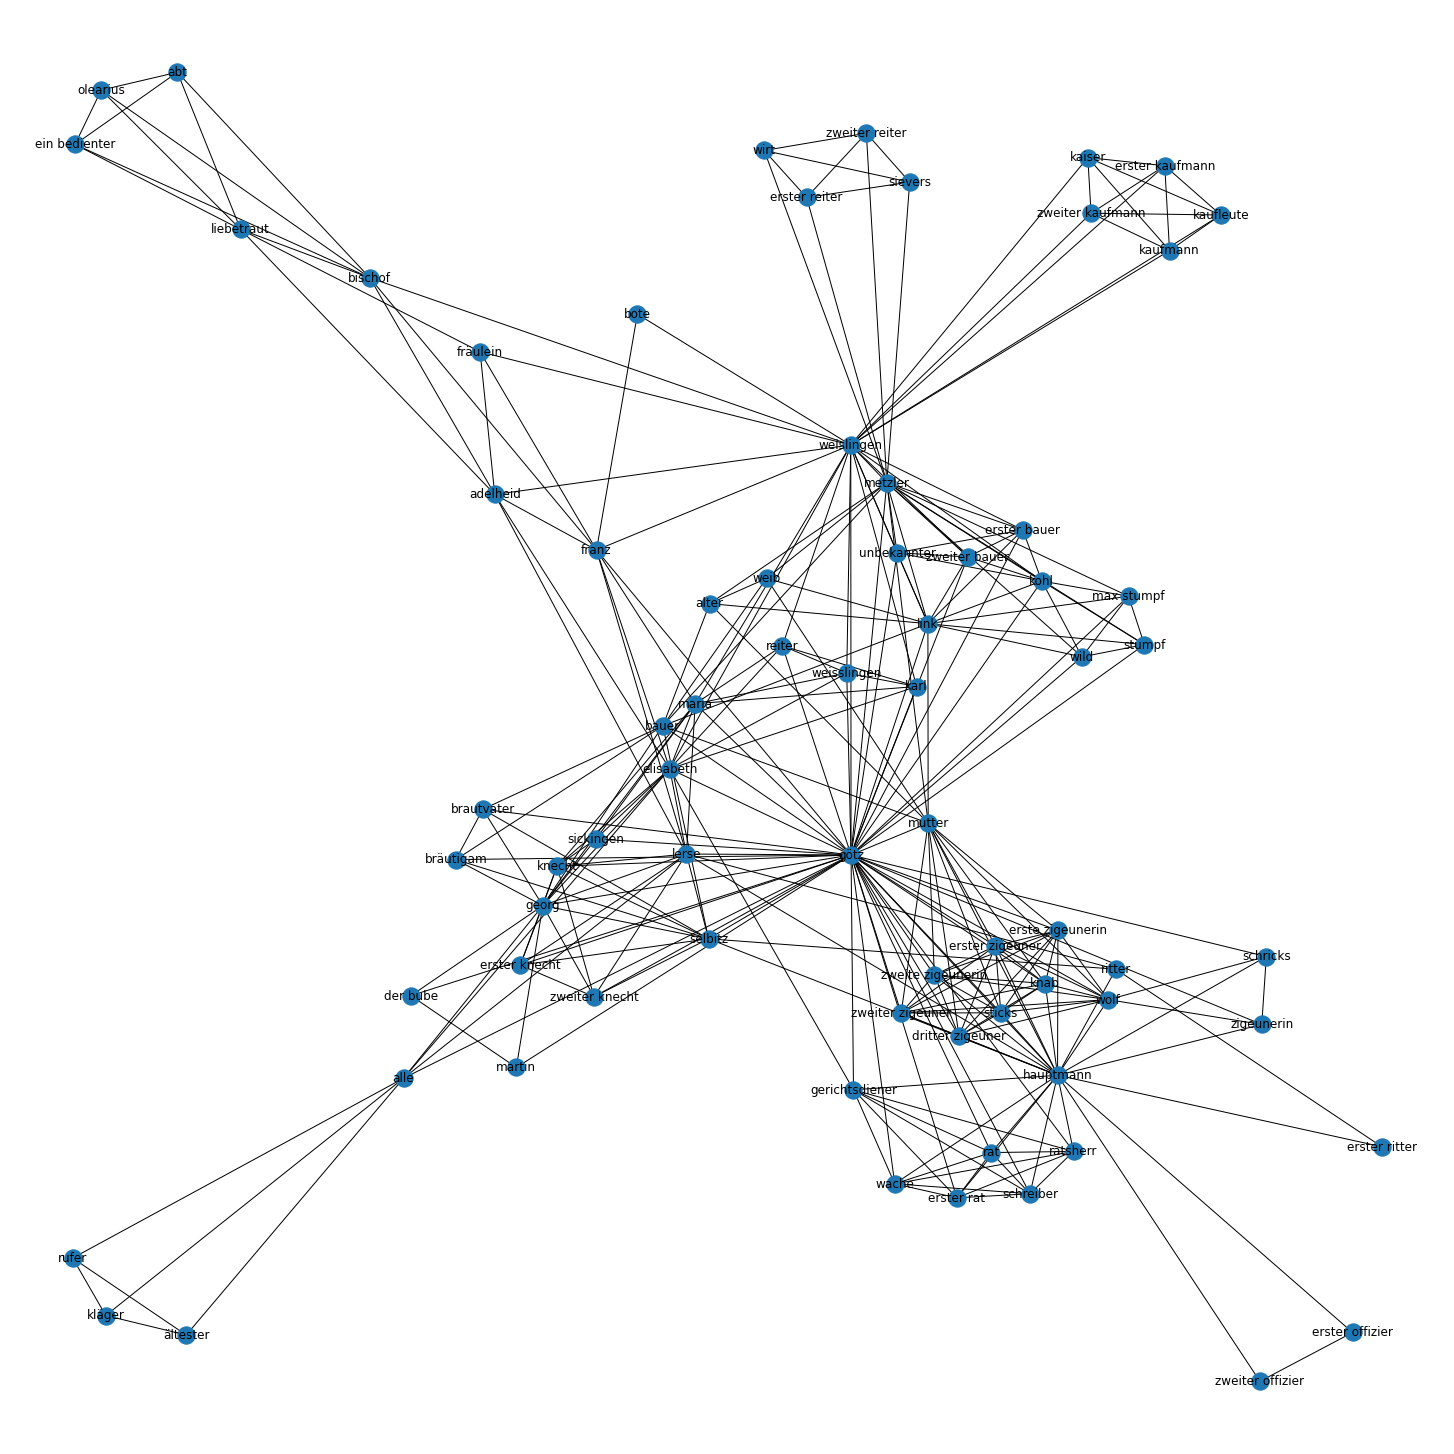

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
nx.draw(G, with_labels=True)

In [32]:
centrality = pandas.Series(nx.degree_centrality(G))
centrality

metzler           0.246575
wirt              0.054795
erster reiter     0.054795
sievers           0.054795
zweiter reiter    0.054795
                    ...   
zigeunerin        0.054795
schricks          0.054795
rufer             0.041096
ältester          0.041096
kläger            0.041096
Length: 74, dtype: float64

In [42]:
avg_degree = centrality.mean()

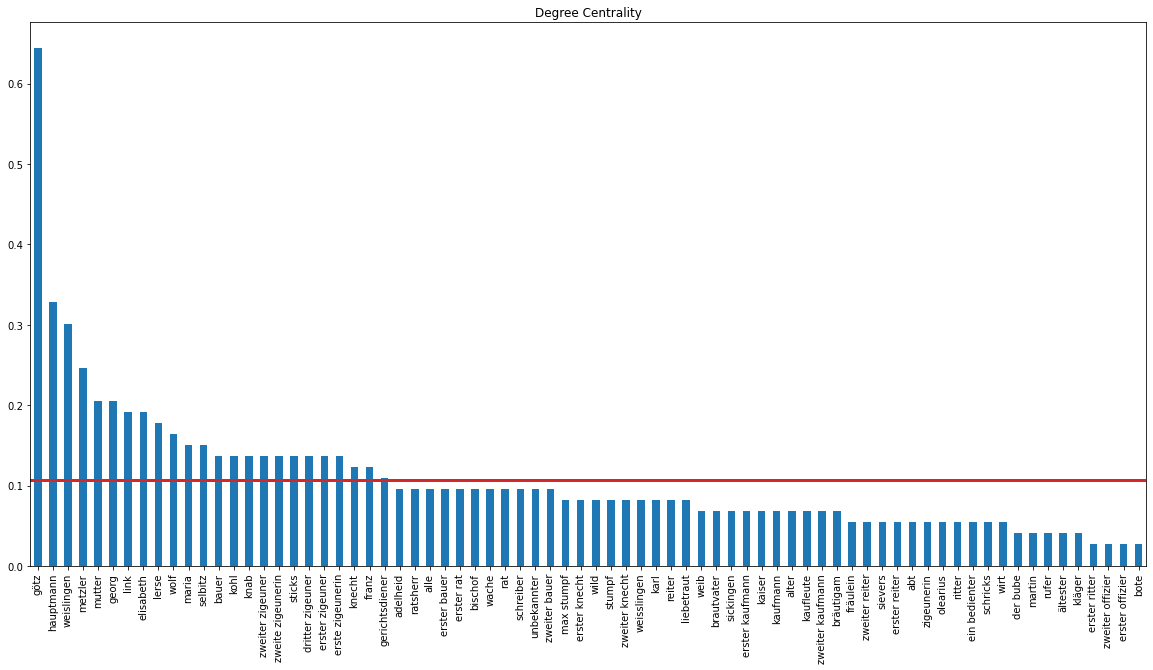

In [46]:
plt.figure(figsize=(20,10))
centrality.sort_values(ascending=False).plot(kind='bar')
plt.title('Degree Centrality')
plt.hlines(avg_degree, -1, len(centrality), color='tab:red', lw=3)

Degree centrality: Anzahl Kanten inzident zum Knoten

Im Fall Götz: Anzahl unterschiedl. Figuren welche mit Götz einmal auf der Bühne stehen

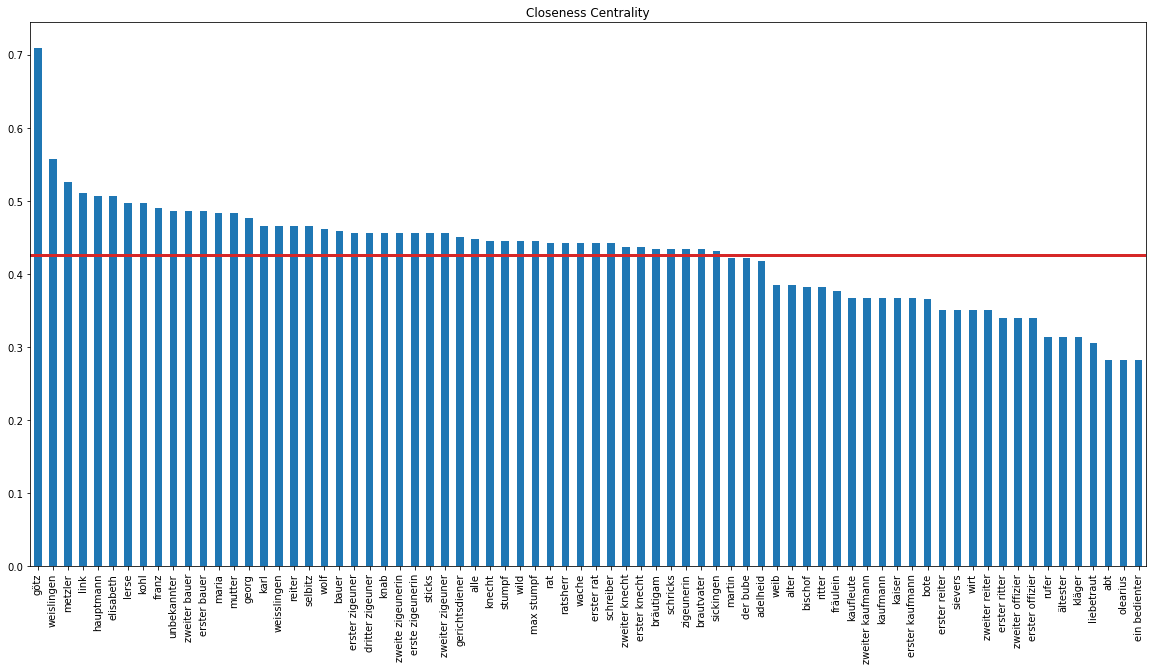

In [47]:
centrality = pandas.Series(nx.closeness_centrality(G))
plt.figure(figsize=(20,10))
centrality.sort_values(ascending=False).plot(kind='bar')
plt.title('Closeness Centrality')
plt.hlines(centrality.mean(), -1, len(centrality), color='tab:red', lw=3)

Closeness centrality: Mittlere Distanz vom Knoten zu allen anderen

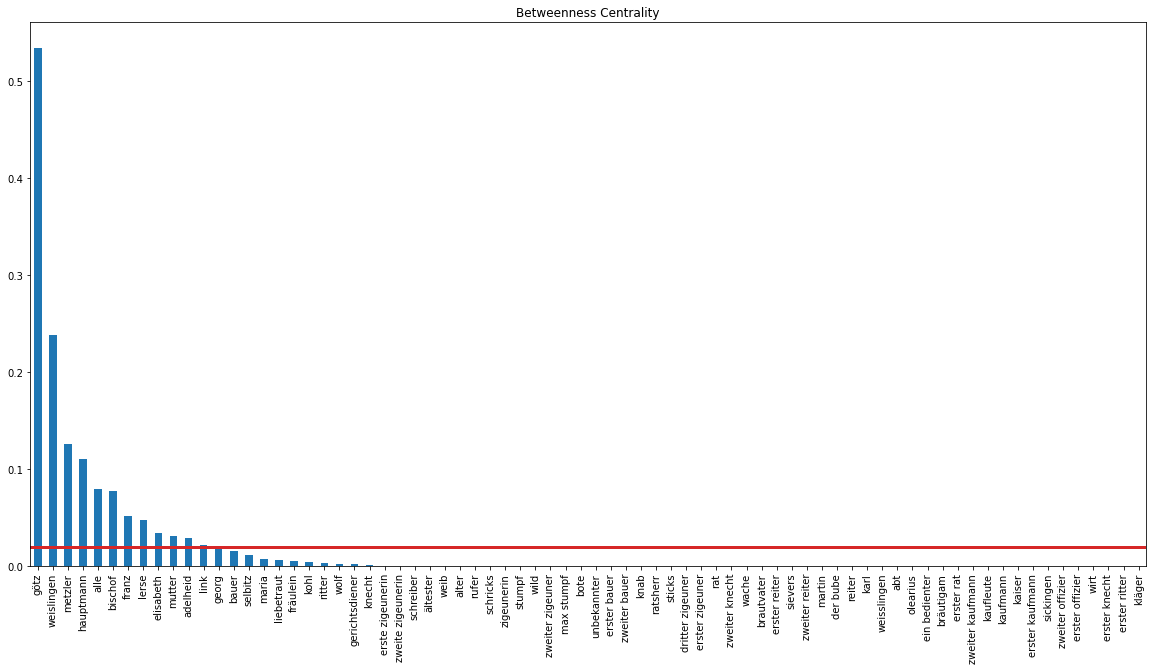

In [49]:
centrality = pandas.Series(nx.betweenness_centrality(G))
plt.figure(figsize=(20,10))
centrality.sort_values(ascending=False).plot(kind='bar')
plt.title('Betweenness Centrality')
plt.hlines(centrality.mean(), -1, len(centrality), color='tab:red', lw=3)

Betweenness centrality: Anteil der kürzesten Wege die durch den fraglichen Knoten laufen